## ConvTex

Motivation 

1. Machine learning is eating the world. Gotta git in on dat.
2. Simple interesting task with layers of difficulty
3. High level Alpha-go: Search + NN = gud
4. Algebra is highly automatic. Possibly in the eye even? Changes from x -> y or E -> B or
other simple visual/naming changes can really throw a person off.
5. Notation is geometric. Good notation is sometimes what let's us go farther than Newton could, despite him
being far more intelligent. (Well, that and other conceptual advances, new questions, new data, etc)
6. 2D convnets are commonplace and highly advanced.One should try to shoehorn problems into this framework
I've seen audio turned into spectrograms, and characters sort of arbitrarily smashed together. Also could make sense to draw
graphs and anlayze them that way instead of 


## Objections
1. Math is trees. Your network is going to need to learn to recognize characters and parse unnecessarily.
Ok. Mathemtaical expressions as trees is a model. Perhaps not a good one. I feel like the first
impulse is to use sequence models, but sequence are not a good model of mathematical syntax/notation either.
Anecdotally, I find spoken word mathematics very difficult to understand, which is a sequentialization.
Sequences may remove character recognition but still means the netowrk needs to learn to "parse". 2D seems like it is already "parsed" a little bit geometrically.
2. Rendering a big image is extremely inefficient. Yes, bu perhaps if the technique basically works, one 
can render low res or notation intended for computers that would be somewhat difficult for humans to read. But still has geometric structure


## Tasks
#### Numbers

1. Digit Recognition. MNIST basically.
2. Integer recognition. Binary? Hex? Decimal? Something to think about
2. Binary Integer addition
3. Binary Float recognition. Float Addition
4. Nested Addition
5. Addition + Multiplication
6. Big jump : Variables. Simplify polynomials?
7. Simplification? Integration (like that paper). "Point" to spots.
8. 

#### Logic

1. True or False recognition. $\top$ $\bot$
2. And, Or evaluation
3. Have network pick boolean variable to case on.
4. Have network pick sequent rules to use and location. http://logitext.mit.edu/tutorial





In [ ]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
import torch

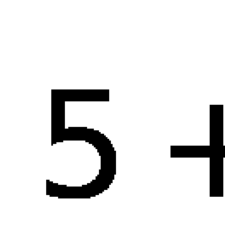

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

HEIGHT = 128
WIDTH = 128

DPI = 96
FONT_SIZE = 64

def latex_to_image(latex):
    fig = Figure(figsize=(WIDTH/DPI, HEIGHT/DPI), dpi=DPI)
    ax = fig.gca()

    ax.text(0.0,0.0,f"${latex}$", fontsize=FONT_SIZE)
    ax.axis('off')
    plt.axis('off')

    canvas = FigureCanvas(fig)
    canvas.draw()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape((HEIGHT,WIDTH,3))[:,:,0]
    plt.close(fig)
    return image

def make_batch(inputs):
    return torch.tensor([latex_to_image(latex) for latex in inputs]).unsqueeze(1).float() / 255.0

def make_random_batch_and_labels(n):
    numbers = np.random.randint(10, size=n)
    strings = numbers.astype(str)
    #labels = np.zeros((numbers.size, 10))
    #labels[np.arange(numbers.size), numbers] = 1

    return make_batch(strings), torch.tensor(numbers)

img = latex_to_image(r"5+5")
plt.imshow(img, cmap='gray')

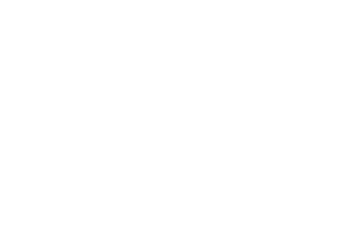

In [ ]:
all_digits_batch = make_batch(np.arange(10).astype(str))


def make_random_digits_batch_and_labels(n):
    numbers = np.random.randint(10, size=n)
    return all_digits_batch[numbers], torch.tensor(numbers)

torch.Size([10, 1, 128, 128])


tensor(0.)

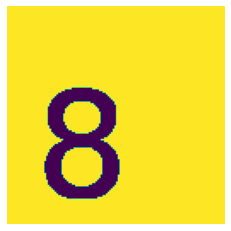

In [ ]:
batch = make_batch(np.arange(10))
print(batch.shape)
batch.dtype
plt.imshow(batch[8,0,:,:])
torch.min(batch)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 30 * 30, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
net(batch)


tensor([[-0.1024,  0.0244, -0.1164, -0.1150,  0.0022,  0.0749, -0.1147, -0.0366,
         -0.0136, -0.0106],
        [-0.1044,  0.0207, -0.1135, -0.1212,  0.0010,  0.0742, -0.1075, -0.0322,
         -0.0180, -0.0071]], grad_fn=<AddmmBackward>)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=2., momentum=0.9)
optimizer = optim.Adam(net.parameters())

In [ ]:

for i in range(10):
    
    inputs, labels = make_random_digits_batch_and_labels(1000)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    print('[%d] loss: %.3f' % (i + 1, loss.item()))

print('Finished Training')

[1] loss: 1.252
[2] loss: 1.160
[3] loss: 1.043
[4] loss: 0.912
[5] loss: 0.791
[6] loss: 0.695
[7] loss: 0.580
[8] loss: 0.491
[9] loss: 0.409
[10] loss: 0.344
Finished Training


tensor([9, 4, 6, 1, 6, 9, 9, 2, 3, 0, 0, 3, 7, 8, 7, 1, 8, 8, 7, 2, 0, 9])
tensor([9, 4, 6, 1, 6, 9, 9, 2, 3, 0, 0, 3, 7, 8, 7, 1, 8, 8, 7, 2, 0, 9])


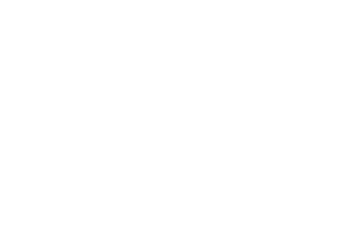

In [ ]:
inputs, labels = make_random_digits_batch_and_labels(22)
output = net(inputs)
print(torch.argmax(output, dim=1))
print(labels)


In [ ]:
n = 10000
inputs, labels = make_random_digits_batch_and_labels(n)
output = net(inputs)
(torch.argmax(output, dim=1) == labels).sum()


KernelInterrupted: Execution interrupted by the Jupyter kernel.